In [7]:
import cv2
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
# 创建级联分类器
cascades_path = 'C:/Users/57770/Anaconda3/Lib/site-packages/cv2/data/'
classifier_face = cv2.CascadeClassifier(cascades_path + 'haarcascade_frontalface_default.xml')
classifier_eye = cv2.CascadeClassifier(cascades_path + 'haarcascade_eye.xml')

In [1]:
def grid_face(gray):
    # 检测脸
    imgRects=classifier_face.detectMultiScale(gray, 1.3, 5)
    # 排序，选择1个图像
    sorted_by_size = sorted(imgRects, key=lambda x: -x[1])
    imgRects = sorted_by_size[:1]
    if len(imgRects)==0:
        return [0,0,0,0]
    return imgRects[0]

In [17]:
def detect_eye(img):
    # 转换为灰度图像
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)
    # 获得脸的尺寸
    facex,facey,facew,faceh=grid_face(gray)
    gray_face=gray[facey:(facey+faceh),facex:(facex+facew)]
    # 检测眼睛
    imgRects = classifier_eye.detectMultiScale(gray_face)
    # 排序，选择2个图像
    sorted_by_size = sorted(imgRects, key=lambda x: -x[2])
    imgRects = sorted_by_size[:2]
    # 检测结果
    if len(imgRects) > 0:
        for imgRect in imgRects:
            x, y, w, h = imgRect
            x,y=x+facex,y+facey
            radius=int((w+h)/4)
            cv2.circle(img, (int((2*x+w)/2), int((2*y+h)/2)), radius,(0, 255, 0), 2)
            cv2.circle(img, (int((2*x+w)/2), int((2*y+h)/2)), 2,(0, 0, 255), 2)
    return img

In [12]:
def test(path):
    img=cv2.imread(path)
    img_face=detect_eye(img)
    plt.figure(figsize=(10,10))
    plt.imshow(cv2.cvtColor(img_face, cv2.COLOR_BGR2RGB), interpolation="bicubic")
    plt.axis('off') # 不显示坐标轴
    plt.show()

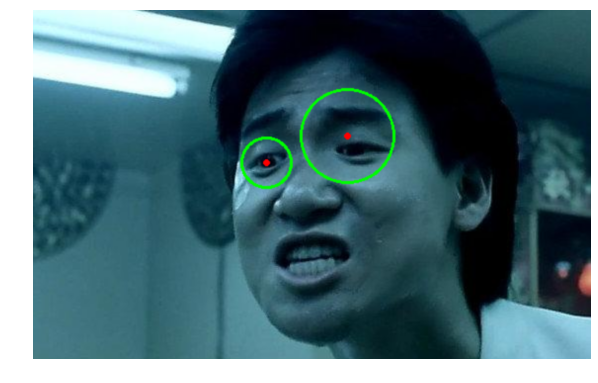

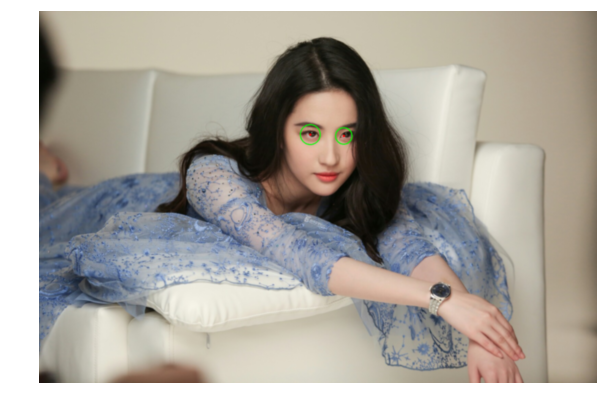

In [18]:
test('test_1.jpg')
test('test_2.jpg')

In [19]:
import numpy as np
import cv2
import time
from threading import Timer
from PIL import Image, ImageDraw, ImageFont
 
#打开本地摄像头，括号内表示设备编号，第一个设备为0，如果电脑有两个摄像头，第二个摄像头就是1
cap=cv2.VideoCapture(0)
#定义全局变量，用于进行if判断的条件
global timer_int
timer_int = 1
#定时器的时间，单位为秒
timer_interval = 0.1
 
#定时函数
def timerDelay():
    global timer_int
    timer_int = 1
    global t
    t = Timer(timer_interval, timerDelay)
    t.start()
 
 
t = Timer(timer_interval, timerDelay)
t.start()
 
while(True):
    #从摄像头中读取画面，while表示循环读取画面，也就是一张一张图片形成了一个视频
    #第一个参数ret的值为True或False，代表有没有读到图片。第二个参数frame，是当前截取一帧的图片
    ret,image=cap.read()
 
    #设置每一张图片的颜色
    img_color=cv2.cvtColor(image,cv2.IMREAD_COLOR)
 
    #显示窗口
    cv2.imshow('window',img_color)
 
    if timer_int == 1:
        #某一时刻的图片
        img_color1 = img_color
        #跳出if,等待下一个时刻
        timer_int =  0
 
    #显示新窗口，用于显示某一时刻的截图
    img=detect_eye(img_color1)
    # img=detect_img(img_color1,classifier_face,1)
    cv2.imshow('screenshot', img)
 
    #如果按下键盘上的Q就关闭窗口 ord()返回值是对应的十进制整数
    if cv2.waitKey(1)&0xFF==ord('q'):
        break
 
#释放资源
cap.release()
 
#关闭窗口
cv2.destroyAllWindows()